# Sentiment Analysis for Movie Reviews

__import Libraries:__

In [1]:
import numpy as np 
import pandas as pd 
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import joblib

# Data Preprocessing

__Loading datasets:__

In [2]:
mr_data = pd.read_csv('/Users/Shivanibommagani/OneDrive/Desktop/IMDB.csv')
mr_data.shape

(50000, 2)

In [3]:
mr_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
mr_data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
mr_data.sentiment.replace('positive', 1, inplace=True)
mr_data.sentiment.replace('negative', 0, inplace=True)
mr_data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Analysis of data
Number of samples: 50000
Sentiment distribution:
1    25000
0    25000
Name: sentiment, dtype: int64


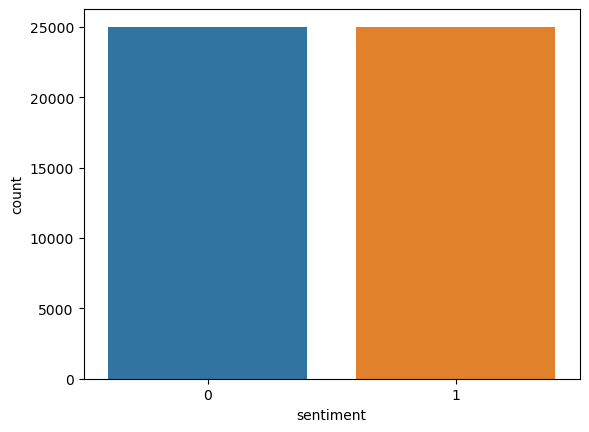

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Analysis of data")
print("Number of samples:", len(mr_data))
print("Sentiment distribution:")
print(mr_data['sentiment'].value_counts())
sns.countplot(x='sentiment', data=mr_data)
plt.show()

In [7]:
from wordcloud import WordCloud


__Data Cleaning:__

Clean the movie reviews in the data by removing special characters, HTML tags, stop words and by converting all the uppercase characters into lower case ,Stemming.

__Removing HTML tags from reviews:__

In [8]:
def htmltags(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

mr_data.review = mr_data.review.apply(htmltags)
mr_data.review[0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

__Removing special characters from reviews :__

In [9]:
def specialchar(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

mr_data.review = mr_data.review.apply(specialchar)
print(f"After removing special characters from reviews : \n{mr_data.review[0]}\n")

After removing special characters from reviews : 
One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is 

In [10]:
def lowercase(text):
    return text.lower()

mr_data.review = mr_data.review.apply(lowercase)
print(f"converting everything to lowercase in reviews : \n{mr_data.review[0]}\n")


converting everything to lowercase in reviews : 
one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is d

In [11]:
def sw(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

mr_data.review = mr_data.review.apply(sw)
print(f"Review sample after removing stopwords : \n{mr_data.review[0]}\n")

Review sample after removing stopwords : 
['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'ma

In [12]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

mr_data.review = mr_data.review.apply(stem_txt)
print(f"Review sample after stemming the words : \n{mr_data.review[0]}\n")

Review sample after stemming the words : 
one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort v

In [13]:
# 3.1 Creating Bag Of Words (BOW)
mr_X = np.array(mr_data.iloc[:,0].values)
mr_y = np.array(mr_data.sentiment.values)
mr_cv = CountVectorizer(max_features = 2000)
mr_X = mr_cv.fit_transform(mr_data.review).toarray()
print(f"Bag of words\n")
print(f"{mr_X.shape}")
print(f"{mr_y.shape}\n")


Bag of words

(50000, 2000)
(50000,)



In [14]:
from sklearn.base import TransformerMixin 
class predictors(TransformerMixin):
    def transform(self, mr_X, **transform_params):
        return [clean_text(text) for text in mr_X]
    def fit(self, mr_X, mr_y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
def clean_text(text):
    if isinstance(text, str):
        return text.strip().lower()
    elif isinstance(text, np.ndarray):
        return np.vectorize(clean_text)(text)
    else:
        # Handle other data types if needed
        return text

def custom_preprocessor(doc):
    if isinstance(doc, str):
        return doc.lower()
    elif isinstance(doc, np.ndarray):
        return np.vectorize(custom_preprocessor)(doc)
    else:
        return doc

def custom_tokenizer(doc):
    if isinstance(doc, str):
        return doc.split()  # Use your desired tokenization logic
    elif isinstance(doc, np.ndarray):
        return np.vectorize(custom_tokenizer)(doc)
    else:
        return doc

cv = CountVectorizer(preprocessor=custom_preprocessor, tokenizer=custom_tokenizer)






In [15]:
mr_Xtr, mr_Xte, mr_ytr, mr_yte = train_test_split(mr_X, mr_y, test_size=0.2, random_state=9)

# Model Creation

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classifier = LogisticRegression()
lrmod = Pipeline([("cleaner", predictors()),
                 ('vectorizer', cv),
                 ('classifier', classifier)])

# Train the Model
lrmod.fit(mr_Xtr,mr_ytr)   
pred_lr = lrmod.predict(mr_Xte)
print(f'Confusion Matrix:\n{confusion_matrix(mr_yte,pred_lr)}')
print(f'\nClassification Report:\n{classification_report(mr_yte,pred_lr)}')
print(f'Accuracy: {accuracy_score(mr_yte,pred_lr)*100}%')

Confusion Matrix:
[[2518 2505]
 [2330 2647]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      5023
           1       0.51      0.53      0.52      4977

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000

Accuracy: 51.65%


In [43]:
# Another random review
pre = lrmod.predict(["Production has an incredibly important place to shoot a series or film. Sometimes even a very minimalist story can reach an incredibly successful point after the right production stages. The Witcher series is far from minimalist. The Witcher is one of the best Middle-earth works in the world. Production quality is essential if you want to handle such a topic successfully"])
print(f'Prediction: {pre[0]}')

Prediction: 1


In [44]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 200)
rand_mod = Pipeline([("cleaner", predictors()),
                 ('vectorizer', cv),
                 ('classifier', RFclassifier)])

# Train the Model
rand_mod.fit(mr_Xtr,mr_ytr)   
pred_rf = rand_mod.predict(mr_Xte)
print(f'Confusion Matrix:\n{confusion_matrix(mr_yte,pred_rf)}')
print(f'\nClassification Report:\n{classification_report(mr_yte,pred_rf)}')
print(f'Accuracy: {accuracy_score(mr_yte,pred_rf)*100}%')

Confusion Matrix:
[[2591 2432]
 [2362 2615]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      5023
           1       0.52      0.53      0.52      4977

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000

Accuracy: 52.059999999999995%


In [45]:
# Another random review
pre = rand_mod.predict(["I think this is my first review. This series is so bad I had to write one. I don't understand the good score. I have tried on 2 separate occasions to watch this show. Haven't even gotten past the 2nd episode because it is SO BORING."])
print(f'Prediction: {pre[0]}')

Prediction: 0


In [31]:
from sklearn.svm import LinearSVC
SVC_clf = LinearSVC()
SVC_mod = Pipeline([("cleaner", predictors()),
                 ('vectorizer', cv),
                 ('classifier', SVC_clf)])

# Train the Model
SVC_mod.fit(mr_Xtr,mr_ytr)   
SVC_pred = SVC_mod.predict(mr_Xte)
print(f'Confusion Matrix:\n{confusion_matrix(mr_yte,SVC_pred)}')
print(f'\nClassification Report:\n{classification_report(mr_yte,SVC_pred)}')
print(f'Accuracy: {accuracy_score(mr_yte,SVC_pred)*100}%')

C:\Users\Shivanibommagani\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
[[   0 5023]
 [   0 4977]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5023
           1       0.50      1.00      0.66      4977

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

Accuracy: 49.769999999999996%


C:\Users\Shivanibommagani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivanibommagani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivanibommagani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
pre = SVC_mod.predict(["Henry cavill nailed the role perfectly. The fight scenes, the music, the cinematography, the whole atmosphere is beyond amazing. Netflix did it again"])
print(f'Prediction: {pre[0]}')

Prediction: 1


In [33]:
g, m, b = GaussianNB(), MultinomialNB(alpha=1.0,fit_prior=True), BernoulliNB(alpha=1.0,fit_prior=True)
g.fit(mr_Xtr, mr_ytr)
m.fit(mr_Xtr, mr_ytr)
b.fit(mr_Xtr, mr_ytr)

BernoulliNB()

In [34]:
ypg = g.predict(mr_Xte)
ypm = m.predict(mr_Xte)
ypb = b.predict(mr_Xte)
print(f'Confusion Matrix:\n{confusion_matrix(mr_yte,ypg)}')
print(f'\nClassification Report:\n{classification_report(mr_yte,ypg)}')
print(f"Gaussian accuracy    =  {round(accuracy_score(mr_yte, ypg), 2)*100} %")
print(f"Multinomial accuracy =  {round(accuracy_score(mr_yte, ypm), 2)*100} %")
print(f"Bernoulli accuracy   =  {round(accuracy_score(mr_yte, ypb), 2)*100} %")



Confusion Matrix:
[[4286  737]
 [1883 3094]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.77      5023
           1       0.81      0.62      0.70      4977

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.73     10000
weighted avg       0.75      0.74      0.73     10000

Gaussian accuracy    =  74.0 %
Multinomial accuracy =  84.0 %
Bernoulli accuracy   =  85.0 %


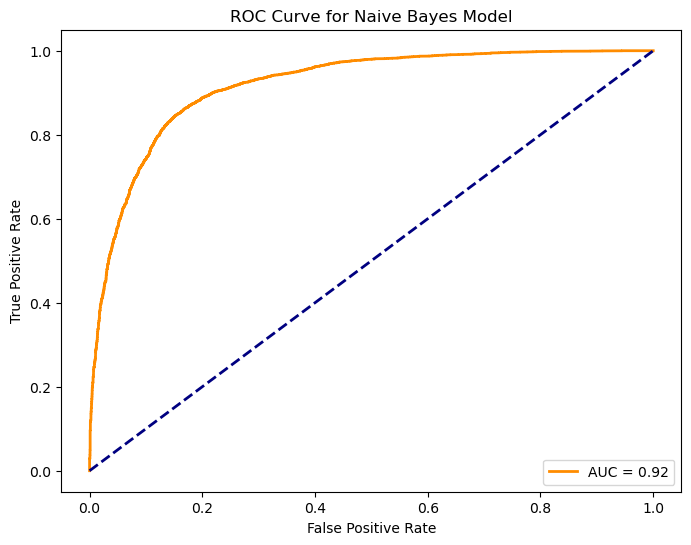

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = b.predict_proba(mr_Xte)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(mr_yte, y_scores)

# Calculate the AUC score
roc_auc = roc_auc_score(mr_yte, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()


# Results and comparisions

<function matplotlib.pyplot.show(close=None, block=None)>

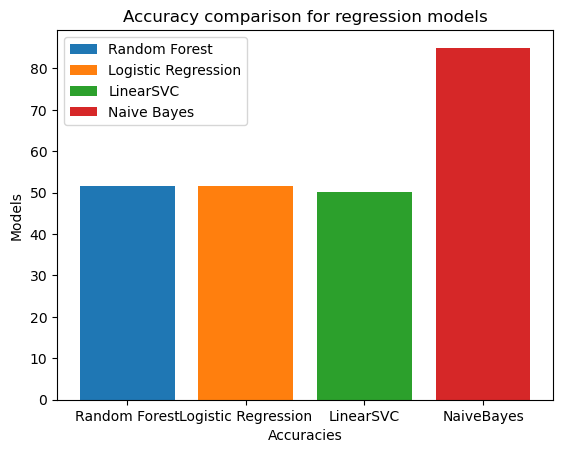

In [36]:
plt.bar("Random Forest",51.65,label="Random Forest")
plt.bar("Logistic Regression",51.65 ,label="Logistic Regression")
plt.bar("LinearSVC",50.23 ,label="LinearSVC")
plt.bar("NaiveBayes",85 ,label="Naive Bayes")
plt.xlabel("Accuracies")
plt.ylabel("Models")
plt.title("Accuracy comparison for regression models")
plt.legend()
plt.show

__NaiveBayes Accuracy Comparision:__

<function matplotlib.pyplot.show(close=None, block=None)>

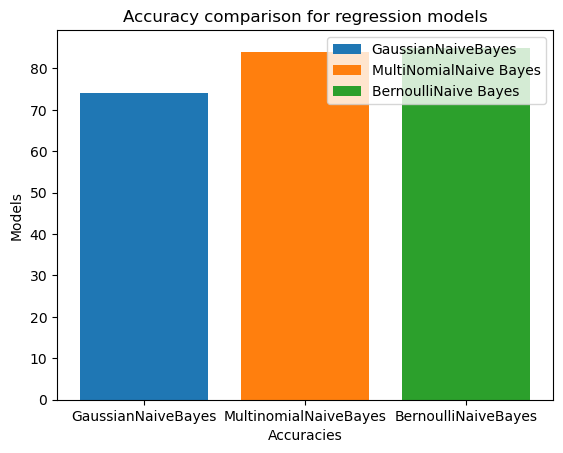

In [37]:
plt.bar("GaussianNaiveBayes",74 ,label="GaussianNaiveBayes")
plt.bar("MultinomialNaiveBayes",84 ,label="MultiNomialNaive Bayes")
plt.bar("BernoulliNaiveBayes",85 ,label="BernoulliNaive Bayes")
plt.xlabel("Accuracies")
plt.ylabel("Models")
plt.title("Accuracy comparison for regression models")
plt.legend()
plt.show